# 学習データのダウンロードとその画像表示

学習データをダウンロードし、最初の10枚の画像を表示するプログラム。ラベルも合わせて表示。

11490434/11490434 [==============================] - 0s 0us/step


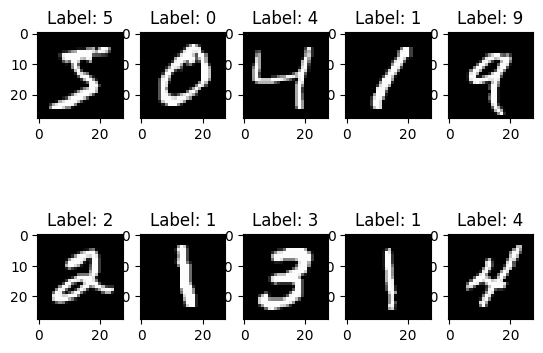

In [1]:
# 必要なライブラリをインポート
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# データのロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 最初の10枚の画像とラベルを表示
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label: " + str(y_train[i]))
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
plt.show()

# 学習データのダウンロードからCNNの作成・学習・評価まで

学習データをダウンロードし、深層学習ニューラルネットワークを作成し、訓練データで学習し、学習後のニューラルネットをテストデータで評価するプログラム。

> 小規模だが深層学習なので、CPUだけでは学習に少し時間がかかる。このため、**GPUを使う設定にする**とよい。→画面上部の「ランタイム」をクリック→「ランタイムのタイプを変更」をクリック→「ハードウェア アクセラレータ」の「GPU」を選ぶ→「保存」

In [ ]:
# 必要なライブラリをインポート
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# データの準備
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# モデルの作成
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])

# モデルの学習
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 16s 10ms/step - loss: 2.2733 - accuracy: 0.1778 - val_loss: 2.2360 - val_accuracy: 0.3348
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2113 - accuracy: 0.2917 - val_loss: 2.1564 - val_accuracy: 0.5335
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 2.1295 - accuracy: 0.3881 - val_loss: 2.0521 - val_accuracy: 0.5991
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 2.0212 - accuracy: 0.4494 - val_loss: 1.9148 - val_accuracy: 0.6329
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 1.8866 - accuracy: 0.4936 - val_loss: 1.7446 - val_accuracy: 0.6718
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 1.7299 - accuracy: 0.5349 - val_loss: 1.5515 - val_accuracy: 0.7044
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 1.5652 

# 正しく認識できた例と誤った例の画像表示

テストセットのデータに対して正しく認識できた例と誤った例を、それぞれ最初の9枚画像表示。

313/313 [==============================] - 1s 2ms/step


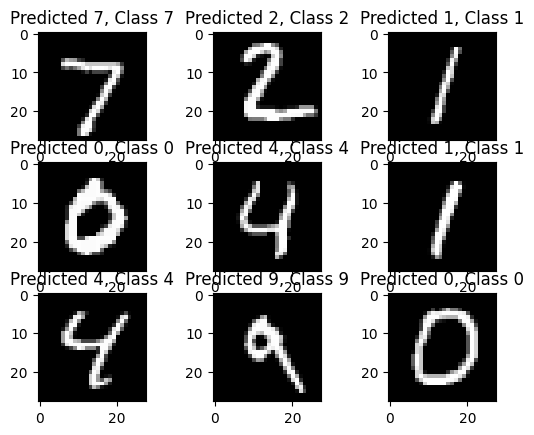

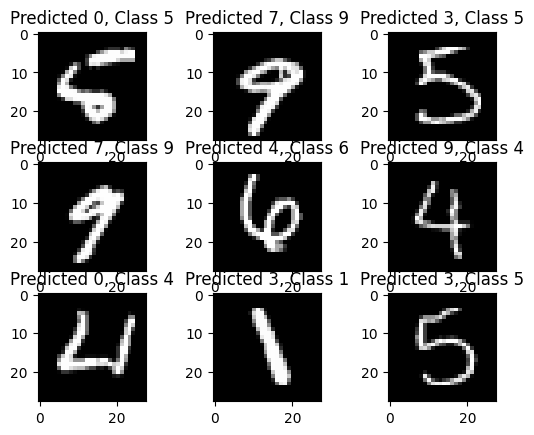

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 予測結果を取得
predictions = model.predict(x_test)

# 予測ラベルと真のラベルを取得
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# 正しく分類した画像と誤って分類した画像のインデックスを取得
correct_indices = np.nonzero(pred_labels == true_labels)[0]
incorrect_indices = np.nonzero(pred_labels != true_labels)[0]

# 正しく分類した画像を表示
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_labels[correct], true_labels[correct]))

# 誤って分類した画像を表示
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_labels[incorrect], true_labels[incorrect]))

# 学習データのダウンロードからCNNの作成・学習・モデルの保存まで

学習データをダウンロードし、深層学習ニューラルネットワークを作成し、訓練データで学習し、学習後のニューラルネットをテストデータで評価し、学習後のニューラルネットをファイルに保存するプログラム。

> 小規模だが深層学習なので、CPUだけでは学習に少し時間がかかる。このため、GPUを使う設定にするとよい。→画面上部の「ランタイム」をクリック→「ランタイムのタイプを変更」をクリック→「ハードウェア アクセラレータ」の「GPU」を選ぶ→「保存」



In [ ]:
# 必要なライブラリをインポート
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# データの準備
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# モデルの作成
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])

# モデルの学習
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# モデルを保存
model.save('/content/drive/MyDrive/Colab_files/cnn_model_mnist.h5') # パスとファイル名は適宜書き換え

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 17s 11ms/step - loss: 2.2847 - accuracy: 0.1452 - val_loss: 2.2537 - val_accuracy: 0.2859
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2345 - accuracy: 0.2610 - val_loss: 2.1899 - val_accuracy: 0.5092
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 2.1673 - accuracy: 0.3697 - val_loss: 2.1041 - val_accuracy: 0.6325
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 2.0758 - accuracy: 0.4569 - val_loss: 1.9869 - val_accuracy: 0.6808
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 1.9525 - accuracy: 0.5177 - val_loss: 1.8305 - val_accuracy: 0.7176
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 1.8037 - accuracy: 0.5615 - val_loss: 1.6393 - val_accuracy: 0.7448
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 1.62

# 保存したモデルの読み込み・評価・正しく認識できた例と誤った例の画像表示

保存したモデルを読み込んで、モデルをテストセットで評価し、テストセットのデータに対して正しく認識できた例と誤った例を、それぞれ最初の9枚画像表示。

Test loss: 0.9244232177734375
Test accuracy: 0.8163999915122986
313/313 [==============================] - 7s 21ms/step


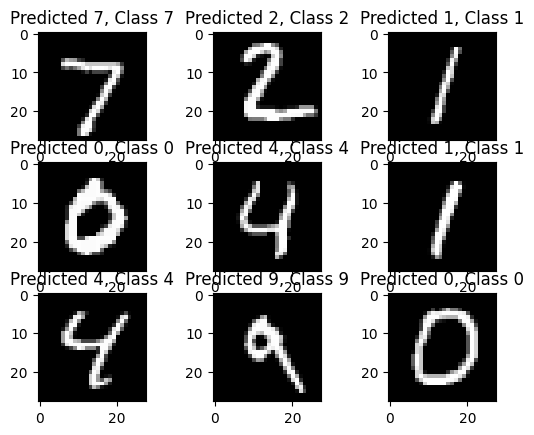

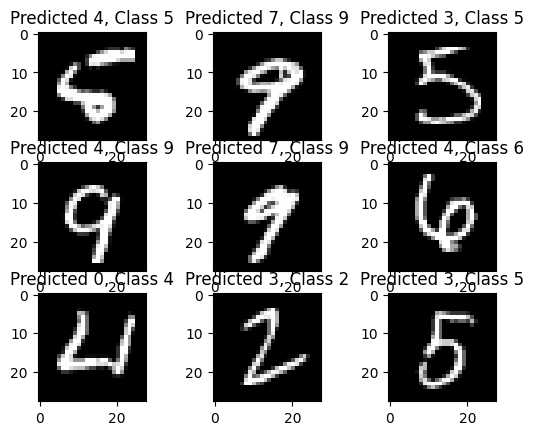

In [ ]:
# 必要なライブラリをインポート
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# データの準備
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32')
x_test /= 255

y_test = tf.keras.utils.to_categorical(y_test, 10)

# 保存したモデルを読み込む
model = load_model('/content/drive/MyDrive/Colab_files/cnn_model_mnist.h5') # パスとファイル名は適宜書き換え

# モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 予測結果を取得
predictions = model.predict(x_test)

# 予測ラベルと真のラベルを取得
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# 正しく分類した画像と誤って分類した画像のインデックスを取得
correct_indices = np.nonzero(pred_labels == true_labels)[0]
incorrect_indices = np.nonzero(pred_labels != true_labels)[0]

# 正しく分類した画像を表示
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_labels[correct], true_labels[correct]))

# 誤って分類した画像を表示
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_labels[incorrect], true_labels[incorrect]))